# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [92]:
# %pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [93]:
# %pip install --upgrade plotly

### Import Statements

In [94]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
import matplotlib.dates as mdates

### Notebook Presentation

In [95]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [96]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [97]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [98]:
df_data.shape

(4324, 9)

In [99]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [100]:
df_data.duplicated().sum()

np.int64(0)

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [101]:
df_data.isna().values.any()

np.True_

In [102]:
df_data[df_data.isna().any(axis=1)]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [103]:
drop_col = df_data.iloc[:, [0, 1]]

In [104]:
df_data.drop(axis=1, columns=drop_col, inplace=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [105]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [106]:
df_data.describe()
# top: most frequent value (mode) for non-numeric columns. For numeric is a MAX value
# freq: how many times the top value appears

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [107]:
df_data["Price"] = pd.to_numeric(df_data["Price"], errors="coerce")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Detail          4324 non-null   object 
 4   Rocket_Status   4324 non-null   object 
 5   Price           949 non-null    float64
 6   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(6)
memory usage: 236.6+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [108]:
by_organisation = df_data.Organisation.value_counts()
by_organisation

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

In [109]:
df_organisation = by_organisation.reset_index()
df_organisation.columns = ["organisation", "count"]

df_organisation = df_organisation.sort_values("count", ascending=True)

fig = px.bar(
    df_organisation,
    x="count",
    y="organisation",
    orientation="h",
    title="Missions count by organisation",
    text="count",
)

fig.update_layout(
    height=1200,
    yaxis_title="Organisation",
    xaxis_title="Mission count",
)

fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [110]:
by_rocket = df_data.Rocket_Status.value_counts()
by_rocket

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

In [111]:
df_rocket = by_rocket.reset_index()
df_rocket.columns = ["status", "count"]

fig = px.pie(
    df_rocket, names="status", values="count", title="Rockets status", hole=0.6
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [112]:
by_mission = df_data.Mission_Status.value_counts()
by_mission

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [113]:
df_mission = by_mission.reset_index()
df_mission.columns = ["status", "count"]

fig = px.pie(
    df_mission,
    names="status",
    values="count",
    title="Mission status",
    hole=0.6,
    color_discrete_sequence=px.colors.qualitative.Set3,
)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

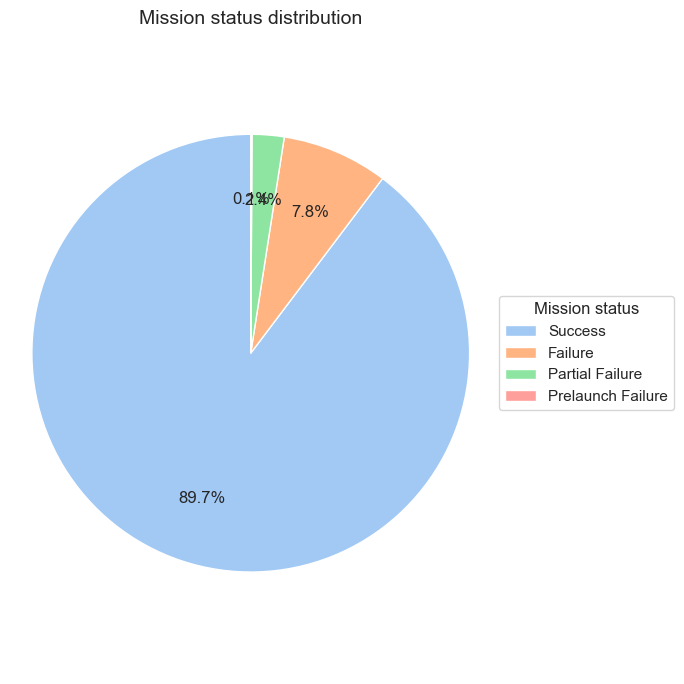

In [114]:
sns.set_theme(style="whitegrid", palette="pastel")

labels = by_mission.index
sizes = by_mission.values

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    sizes,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.7,
    wedgeprops={"edgecolor": "white"},
)

ax.set_title("Mission status distribution", fontsize=14)
ax.axis("equal")  # makes it a circle

ax.legend(labels, title="Mission status", loc="center left", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

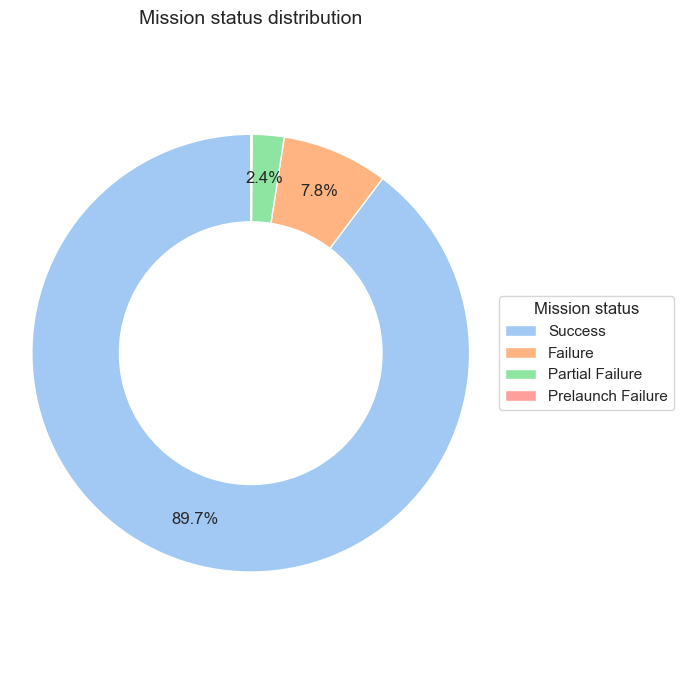

In [115]:
labels = by_mission.index
sizes = by_mission.values


def autopct_threshold(threshold=2): # do not display label if value < 2%
    def autopct(pct):
        return f"{pct:.1f}%" if pct >= threshold else ""

    return autopct


fig, ax = plt.subplots(figsize=(7, 7))

wedges, texts, autotexts = ax.pie(
    sizes,
    startangle=90,
    autopct=autopct_threshold(2),
    pctdistance=0.8,
    wedgeprops={"width": 0.4, "edgecolor": "white"},
)

ax.set_title("Mission status distribution", fontsize=14)
ax.axis("equal")

ax.legend(
    wedges, labels, title="Mission status", loc="center left", bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [116]:
df_data["Date"] = pd.to_datetime(df_data["Date"], format="mixed", utc=True)
df_data["year"] = df_data["Date"].dt.year
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           949 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   year            4324 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 253.5+ KB


In [117]:
df_clean_price = df_data[df_data["Price"].notna()].copy()
df_clean_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    949 non-null    object             
 1   Location        949 non-null    object             
 2   Date            949 non-null    datetime64[ns, UTC]
 3   Detail          949 non-null    object             
 4   Rocket_Status   949 non-null    object             
 5   Price           949 non-null    float64            
 6   Mission_Status  949 non-null    object             
 7   year            949 non-null    int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 63.0+ KB


In [118]:
df_clean_price.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020


In [119]:
df_clean_price.describe()

,Price,year
count,949.00,949.00
mean,129.80,"2,008.04"
std,143.22,11.79
min,5.30,"1,964.00"
25%,40.00,"2,002.00"
50%,62.00,"2,012.00"
75%,164.00,"2,017.00"
max,450.00,"2,020.00"


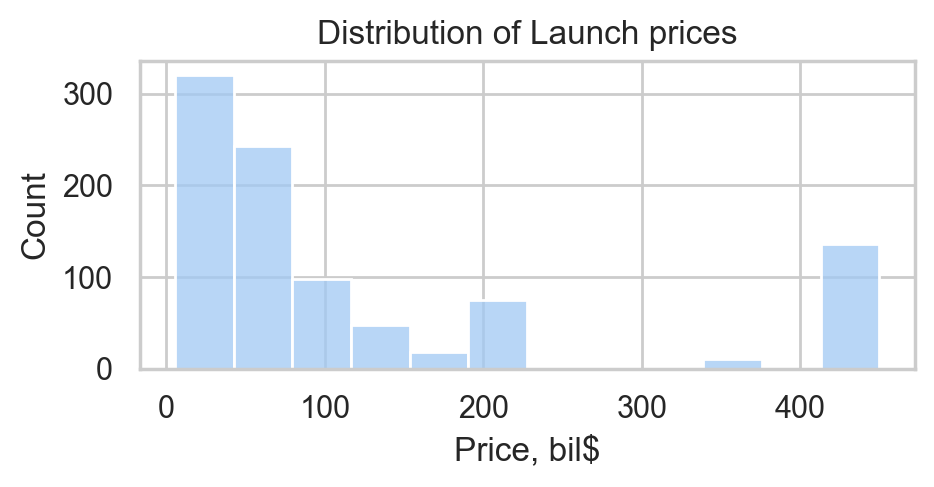

In [120]:
plt.figure(figsize=(5, 2), dpi=200)
price_distribution = sns.histplot(data=df_clean_price, x="Price", bins=12)
plt.xlabel("Price, bil$")
plt.title("Distribution of Launch prices")
plt.show()

In [121]:
# %pip install statsmodels

In [122]:
df_clean_price.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [123]:
yearly_avg_price = df_clean_price.groupby("year")["Price"].mean().reset_index()
yearly_avg_price.head()

,year,Price
0,1964,63.23
1,1965,63.23
2,1966,59.00
3,1967,59.00
4,1968,59.00


<function matplotlib.pyplot.show(close=None, block=None)>

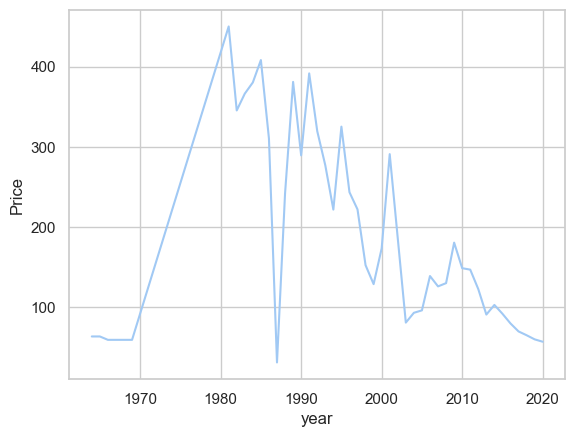

In [124]:
sns.lineplot(yearly_avg_price, x='year', y='Price')
plt.show

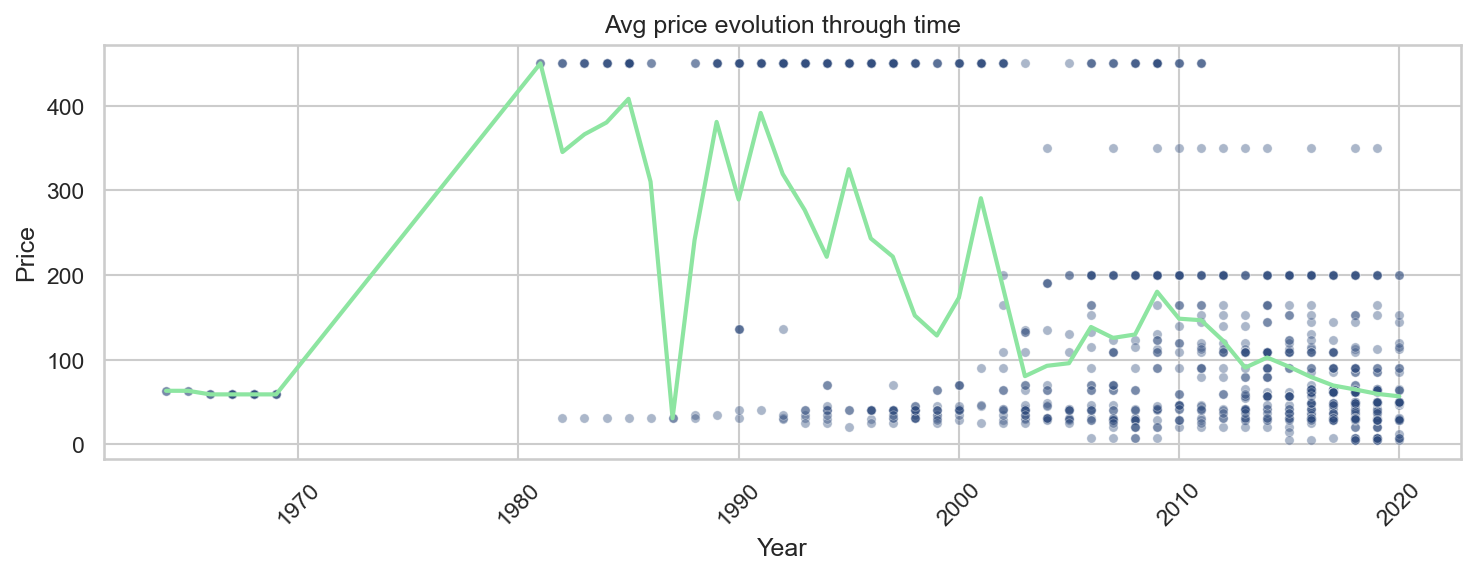

In [125]:
plt.figure(figsize=(10, 4), dpi=150)

sns.scatterplot(
    data=df_clean_price,
    x="year",
    y="Price",
    alpha=0.4,
    color="#2f4b7c",
    s=20,
)

sns.lineplot(
    data=yearly_avg_price,
    x="year",
    y="Price",
    estimator="mean",  # average price per date
    color="g",
    lw=2,
)

plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Avg price evolution through time")
plt.tight_layout()
plt.show()

It's clear that the amount of missions is going up however their avg price is going down.

# Distribution of missions by years

In [126]:
df_data.sort_values(by='year')
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957


In [127]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           949 non-null    float64            
 6   Mission_Status  4324 non-null   object             
 7   year            4324 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), object(5)
memory usage: 253.5+ KB


In [128]:
by_year = df_data.groupby("year").size().reset_index(name="launches").sort_values("year")
by_year

,year,launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


# DIstribution of missions by country 
#### (approximate as i.e. missions sent from Kazakhstan are still under the wing of russia)

In [129]:
df_data['country'] = df_data['Location'].str.split(", ").str[-1]
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,China
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,48.50,Success,2020,Kazakhstan
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success,2020,China
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,50.00,Success,2020,USA
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,90.00,Success,2020,Japan


#### Some country entries no longer exist or their names have to be edited to be well-recognized

In [130]:
df_data.loc[df_data["country"] == "Russia", "country"] = "Russian Federation"
df_data.loc[df_data["country"] == "New Mexico", "country"] = "USA"
df_data.loc[df_data["country"] == "Yellow Sea", "country"] = "China"
df_data.loc[df_data["country"] == "Shahrud Missile Test Site", "country"] = (
    "Iran, Islamic Republic of"
)
df_data.loc[df_data["country"] == "Iran", "country"] = ("Iran, Islamic Republic of")
df_data.loc[df_data["country"] == "Pacific Missile Range Facility", "country"] = "USA"
df_data.loc[df_data["country"] == "Barents Sea", "country"] = "Russian Federation"
df_data.loc[df_data["country"] == "Gran Canaria", "country"] = "USA"
df_data.loc[df_data["country"] == "Pacific Ocean", "country"] = "International"
df_data.loc[df_data["country"] == "South Korea", "country"] = "Korea, Republic of"
df_data.loc[df_data["country"] == "North Korea", "country"] = (
    "Korea, Democratic People's Republic of"
)

In [131]:
by_country = df_data.country.value_counts().reset_index()
by_country

,country,count
0,Russian Federation,1398
1,USA,1351
2,Kazakhstan,701
3,France,303
4,China,269
5,Japan,126
6,India,76
7,International,36
8,"Iran, Islamic Republic of",14
9,New Zealand,13


In [132]:
by_country_year = df_data.groupby(["country", "year"]).size().reset_index(name="count")
by_country_year.head()

,country,year,count
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1969,1
3,Australia,1970,2
4,Australia,1971,1


In [133]:
by_country_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  427 non-null    object
 1   year     427 non-null    int32 
 2   count    427 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 8.5+ KB


In [134]:
by_country_year["year"] = by_country_year["year"].astype(int)

In [135]:
missions_by_year = px.sunburst(
    by_country_year,
    path=["country", "year"],
    values="count",
    color="count",
    color_continuous_scale="Viridis",
    width=1200,
    height=1000,
    title="Sunburst of Missions by year and country",
)

missions_by_year.update_traces(sort=False, selector=dict(type="sunburst")) # keeping df's sort for years, otherwise gets mixes and treats them as string

missions_by_year.show()

In [136]:
by_country_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  427 non-null    object
 1   year     427 non-null    int64 
 2   count    427 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.1+ KB


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [137]:
def to_alpha3(name):
    try:
        return countries.get(name).alpha3
    except KeyError:
        return name

df_data["country_iso_alpha3"] = df_data["country"].apply(to_alpha3)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,country,country_iso_alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA,USA


In [138]:
by_country_iso = df_data.country_iso_alpha3.value_counts().reset_index()
by_country_iso

,country_iso_alpha3,count
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269
5,JPN,126
6,IND,76
7,International,36
8,IRN,14
9,NZL,13


In [139]:
map_by_country = px.choropleth(
    data_frame=by_country_iso,
    locations="country_iso_alpha3",
    color="count",
    hover_name="country_iso_alpha3",
    color_continuous_scale="Aggrnyl_r",
)
map_by_country.update_layout(margin=dict(l=0, r=0, t=0, b=0))
map_by_country.show()

# Use a Choropleth Map to Show the Number of Failures by Country


failures = all - (success)
share of failures = 1 - (success count / total missions)

In [140]:
failures_countries = df_data[df_data['Mission_Status'] != 'Success'] # a df

failures_count = failures_countries["country"].value_counts().reset_index() # a series
failures_count

failure_share = failures_count.merge(by_country, on="country", how="right")
failure_share.columns = ["country", "failures", "total"]
failure_share

failure_share["failures_share"] = failure_share["failures"] / failure_share["total"]

failure_share

,country,failures,total,failures_share
0,Russian Federation,93.00,1398,0.07
1,USA,163.00,1351,0.12
2,Kazakhstan,93.00,701,0.13
3,France,18.00,303,0.06
4,China,25.00,269,0.09
5,Japan,13.00,126,0.10
6,India,13.00,76,0.17
7,International,3.00,36,0.08
8,"Iran, Islamic Republic of",9.00,14,0.64
9,New Zealand,2.00,13,0.15


In [141]:
failure_share["success"] = 1 - failure_share["failures_share"]


In [142]:
# manually editing values to ensure they enter the filtered df
failure_share.loc[failure_share["country"] == "Kenya", ["failures_share", "share", "success"]] = [0, 0.00, 1.00]
failure_share

,country,failures,total,failures_share,success,share
0,Russian Federation,93.00,1398,0.07,0.93,NaN
1,USA,163.00,1351,0.12,0.88,NaN
2,Kazakhstan,93.00,701,0.13,0.87,NaN
3,France,18.00,303,0.06,0.94,NaN
4,China,25.00,269,0.09,0.91,NaN
5,Japan,13.00,126,0.10,0.90,NaN
6,India,13.00,76,0.17,0.83,NaN
7,International,3.00,36,0.08,0.92,NaN
8,"Iran, Islamic Republic of",9.00,14,0.64,0.36,NaN
9,New Zealand,2.00,13,0.15,0.85,NaN


In [143]:
df_data[df_data['country'] == "Kenya"]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,country,country_iso_alpha3
1952,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1988-03-25 19:50:00+00:00,Scout G1 | San Marco 5,StatusRetired,NaN,Success,1988,Kenya,KEN
2936,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1975-05-07 22:45:00+00:00,Scout F1 | Explorer 53,StatusRetired,NaN,Success,1975,Kenya,KEN
2998,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1974-10-15 07:47:00+00:00,Scout B1 | Ariel 5,StatusRetired,NaN,Success,1974,Kenya,KEN
3061,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1974-02-18 10:05:00+00:00,Scout D1 | San Marco 4,StatusRetired,NaN,Success,1974,Kenya,KEN
3187,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1972-11-15 22:13:00+00:00,Scout D1 | Explorer 48,StatusRetired,NaN,Success,1972,Kenya,KEN
3298,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1971-11-15 05:52:00+00:00,Scout B | Explorer 45,StatusRetired,NaN,Success,1971,Kenya,KEN
3357,ASI,"Santa Rita 2, San Marco Launch Platform, Kenya",1971-04-24 07:32:00+00:00,Scout B | San Marco 3,StatusRetired,NaN,Success,1971,Kenya,KEN
3400,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1970-12-12 10:53:00+00:00,Scout B | Explorer 42,StatusRetired,NaN,Success,1970,Kenya,KEN
3780,ASI,"SM Launch Tab, San Marco Launch Platform, Kenya",1967-04-26 10:06:00+00:00,Scout B | San Marco 2,StatusRetired,NaN,Success,1967,Kenya,KEN


In [144]:
failure_share = failure_share.sort_values("failures_share", ascending=True)
failure_share

,country,failures,total,failures_share,success,share
11,Kenya,NaN,9,0.00,1.00,0.00
3,France,18.00,303,0.06,0.94,NaN
0,Russian Federation,93.00,1398,0.07,0.93,NaN
7,International,3.00,36,0.08,0.92,NaN
4,China,25.00,269,0.09,0.91,NaN
5,Japan,13.00,126,0.10,0.90,NaN
1,USA,163.00,1351,0.12,0.88,NaN
2,Kazakhstan,93.00,701,0.13,0.87,NaN
9,New Zealand,2.00,13,0.15,0.85,NaN
6,India,13.00,76,0.17,0.83,NaN


In [145]:
failure_share = failure_share.rename(
    columns={"success": "Success", "failures_share": "Failure"}
)

success_rate = px.bar(
    failure_share,
    x="country",
    y=["Success", "Failure"],
    title="Share of successful missions",
    labels={"variable": "Legend"},
    color_discrete_map={"Failure": "darkorchid", "Success": "mediumseagreen"},
)
success_rate.update_layout(
    xaxis={"categoryorder": "total descending"}, yaxis=dict(tickformat=".0%")
)
success_rate.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [146]:
country_org_missionstatus = (
    df_data.groupby(
        [
            "Mission_Status", "country",
            "Organisation"],
        as_index=False,
    )["Price"]
    .count()
    .rename(columns={"Price": "count"})
)
country_org_missionstatus

,Mission_Status,country,Organisation,count
0,Failure,Australia,CECLES,0
1,Failure,Australia,RAE,0
2,Failure,Brazil,AEB,0
3,Failure,China,CASC,3
4,Failure,China,CASIC,0
...,...,...,...,...
127,Success,USA,Northrop,74
128,Success,USA,SpaceX,93
129,Success,USA,ULA,97
130,Success,USA,US Air Force,23


In [147]:
sunburst = px.sunburst(
    country_org_missionstatus,
    path=["Mission_Status", "country", "Organisation"],
    values="count",
    color="count",
    color_continuous_scale="Viridis",
    width=1200,
    height=1000,
    title="Sunburst of Missions by status, country and organisation",
)

sunburst.show()

# Analyse the Total Amount of Money Spent by countries on Space Missions

In [148]:
df_clean_price1 = df_data[df_data["Price"].notna()].copy()
df_clean_price1

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,country,country_iso_alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,CHN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,2020,China,CHN
...,...,...,...,...,...,...,...,...,...,...
3855,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",1966-07-29 18:43:00+00:00,Titan IIIB | KH-8,StatusRetired,59.00,Success,1966,USA,USA
3971,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-05-06 15:00:00+00:00,Titan IIIA | LES 2 & LCS 1,StatusRetired,63.23,Success,1965,USA,USA
3993,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1965-02-11 15:19:00+00:00,Titan IIIA | LES 1,StatusRetired,63.23,Success,1965,USA,USA
4000,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",1964-12-10 16:52:00+00:00,Titan IIIA | Transtage 2,StatusRetired,63.23,Success,1964,USA,USA


In [149]:
countries_spent = df_data.groupby("country")["Price"].sum().reset_index() # series
countries_spent.columns = ["country", "spent"]
countries_spent = countries_spent[countries_spent["spent"] > 0]
countries_spent["spent"] = countries_spent["spent"].round(2)
countries_spent = countries_spent.sort_values(by='spent', ascending=True)

In [150]:
country_spend_graph = px.bar(
    countries_spent,
    x="spent",
    y="country",
    orientation="h",
    title="Missions spending by country",
    text="spent",
)

country_spend_graph.update_layout(
    height=600,
    yaxis_title="Country",
    xaxis_title="Spent, billions $",
)

country_spend_graph.show()

It's obvious taht most countries do not provide data about mission cost or provide insufficient data.

# Spendings by mission status

In [151]:
spent_bystatus = df_data.groupby("Mission_Status")["Price"].sum().reset_index()  # series
spent_bystatus.columns = ["status", "spent"]
spent_bystatus = spent_bystatus[spent_bystatus["spent"] > 0]
spent_bystatus["spent"] = spent_bystatus["spent"].round(2)
spent_bystatus = spent_bystatus.sort_values(by="spent", ascending=True)

In [152]:
status_spend_graph = px.bar(
    spent_bystatus,
    x="spent",
    y="status",
    orientation="h",
    title="Spending by mission status",
    text="spent",
)

status_spend_graph.update_layout(
    height=400,
    yaxis_title="Status",
    xaxis_title="Spent, billions $",
)

status_spend_graph.show()

Would make sense to analyze monetary data if it was more complete, only 20% of missions provided data on spendings

# Chart the Number of Launches per Year

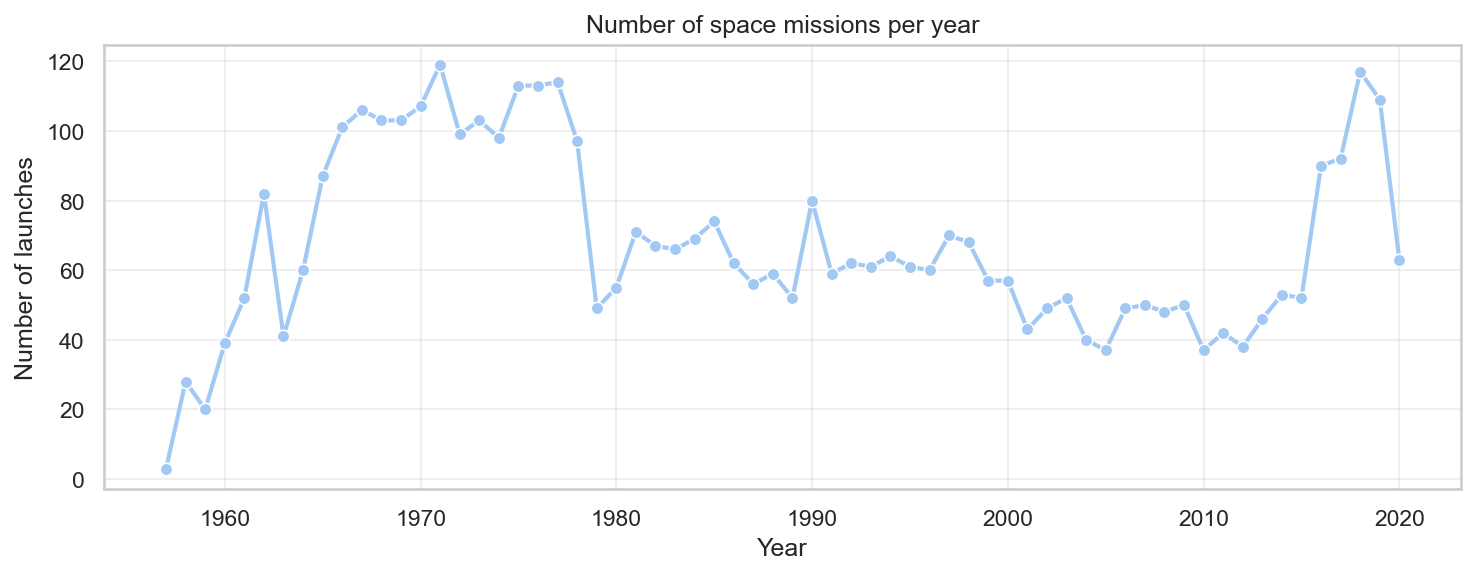

In [153]:
plt.figure(figsize=(10, 4), dpi=150)

sns.lineplot(data=by_year, x="year", y="launches", marker="o", linewidth=2)

plt.xlabel("Year")
plt.ylabel("Number of launches")
plt.title("Number of space missions per year")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [154]:
df_data["year_month"] = df_data["Date"].dt.to_period("M")

launches_per_month = df_data.groupby("year_month").size().reset_index(name="launches")

launches_per_month["year_month"] = launches_per_month["year_month"].dt.to_timestamp() # otherwise cant plot properly
launches_per_month.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_26352\3651965603.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,year_month,launches
0,1957-10-01,1
1,1957-11-01,1
2,1957-12-01,1
3,1958-02-01,2
4,1958-03-01,3


In [155]:
max_month = launches_per_month.loc[launches_per_month["launches"].idxmax()]
max_month

print(
    f"Most active month for space launches was "
    f"{max_month['year_month'].strftime('%B %Y')} "
    f"with {max_month['launches']} launches."
)

Most active month for space launches was December 1971 with 18 launches.


In [156]:
# to have less spikes, i take last 11 months + current month and calc avg
launches_per_month["rolling_12m"] = (
    launches_per_month["launches"].rolling(window=12, min_periods=1).mean()
)

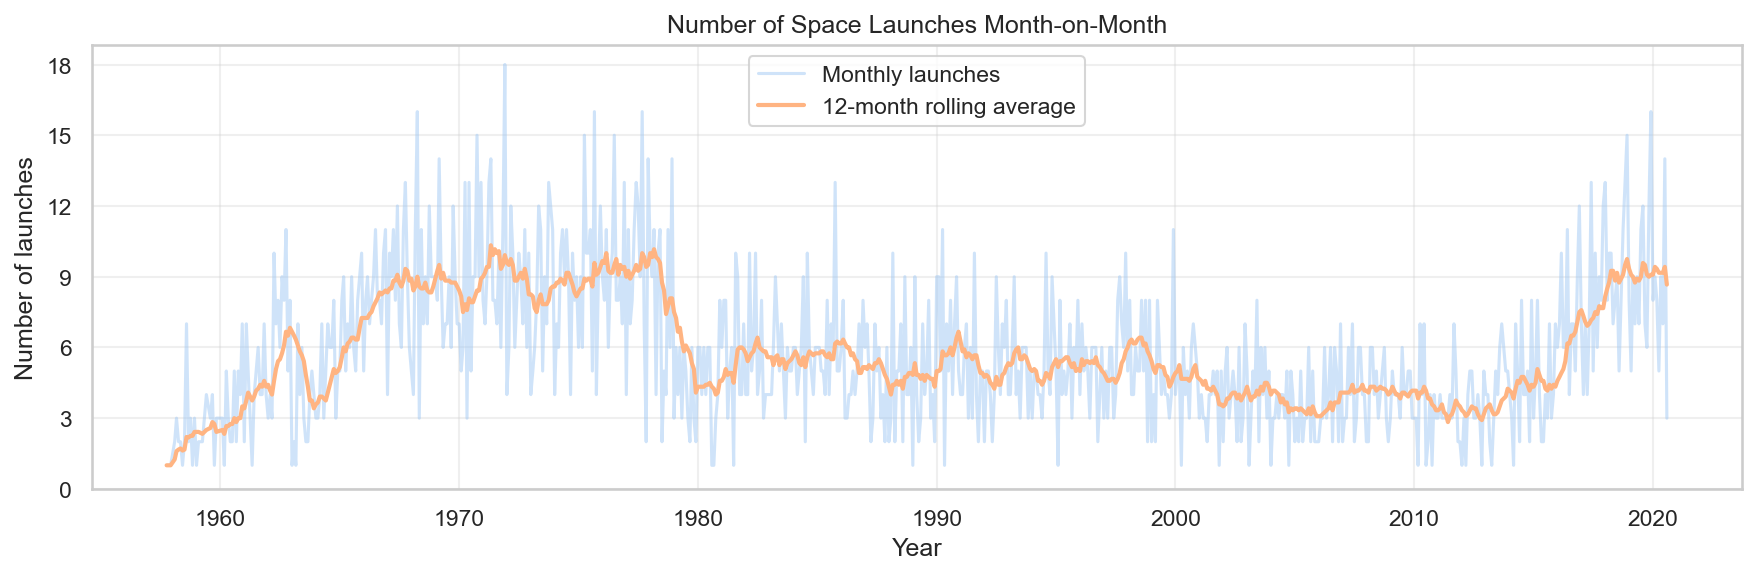

In [157]:
plt.figure(figsize=(12, 4), dpi=150)

sns.lineplot(
    data=launches_per_month,
    x="year_month",
    y="launches",
    label="Monthly launches",
    alpha=0.5,
)

sns.lineplot(
    data=launches_per_month,
    x="year_month",
    y="rolling_12m",
    label="12-month rolling average",
    linewidth=2,
)

plt.xlabel("Year")
plt.ylabel("Number of launches")
plt.title("Number of Space Launches Month-on-Month")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.yticks(range(0, 20 + 1, 3))
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [158]:
df_data["month"] = df_data["Date"].dt.month
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,year,country,country_iso_alpha3,year_month,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,2020,USA,USA,2020-08,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020,China,CHN,2020-08,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020,USA,USA,2020-08,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,2020,Kazakhstan,KAZ,2020-07,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,2020,USA,USA,2020-07,7


In [159]:
by_month = df_data.month.value_counts().sort_index().reset_index()
by_month

,month,count
0,1,268
1,2,336
2,3,353
3,4,383
4,5,326
5,6,402
6,7,351
7,8,373
8,9,365
9,10,381


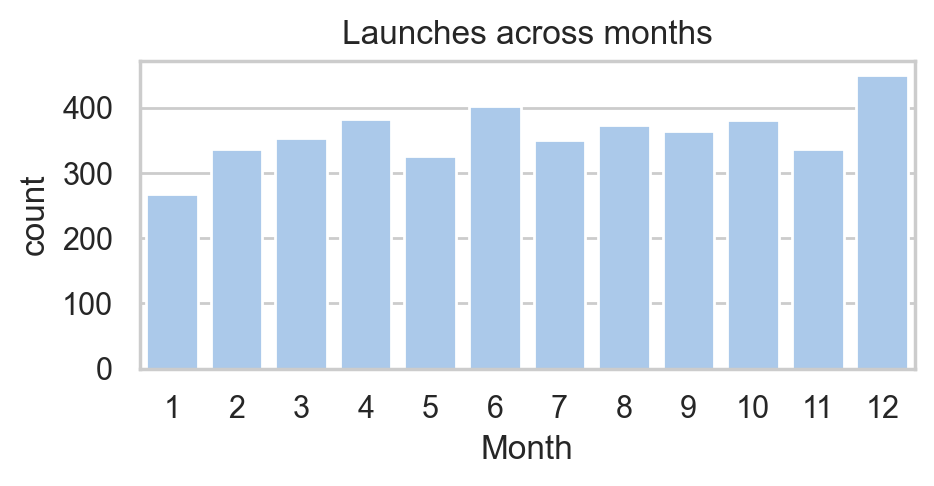

In [160]:
plt.figure(figsize=(5, 2), dpi=200)
sns.barplot(by_month, x='month', y='count')
plt.xlabel("Month")
plt.title("Launches across months")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [161]:
by_organisation.head(10)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

In [162]:
# 1️⃣ Count launches per year per organization
launches_by_org_year = (
    df_data.groupby(["year", "Organisation"]).size().reset_index(name="launches")
)

# 2️⃣ Identify Top 10 organizations by total launches
top_orgs = (
    launches_by_org_year.groupby("Organisation")["launches"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter to top 10 only
launches_by_org_year = launches_by_org_year[
    launches_by_org_year["Organisation"].isin(top_orgs)
]

# 3️⃣ Pivot for stacked plot (years as index, orgs as columns)
launches_pivot = launches_by_org_year.pivot(
    index="year", columns="Organisation", values="launches"
).fillna(0)



<Figure size 1800x750 with 0 Axes>

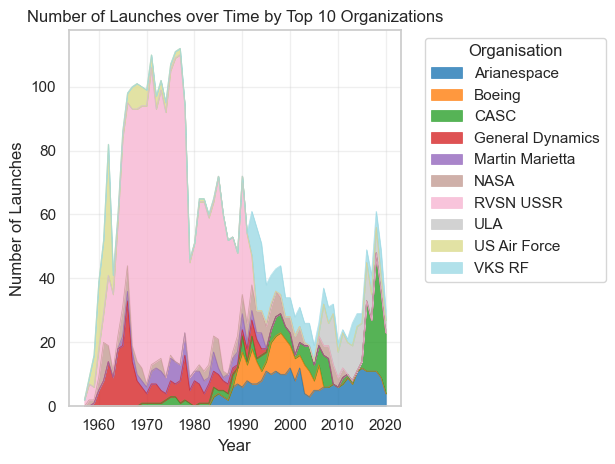

In [163]:
# 4️⃣ Plot stacked area chart
plt.figure(figsize=(12, 5), dpi=150)
launches_pivot.plot.area(colormap="tab20", linewidth=0.5, alpha=0.8)

plt.title("Number of Launches over Time by Top 10 Organizations")
plt.xlabel("Year")
plt.ylabel("Number of Launches")
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [164]:
by_country_year.head()

,country,year,count
0,Australia,1967,1
1,Australia,1968,1
2,Australia,1969,1
3,Australia,1970,2
4,Australia,1971,1


In [165]:
cold_war = by_country_year[
    (by_country_year["year"] < 1992)
    & (
        (by_country_year["country"] == "USA")
        | (by_country_year["country"] == "Russian Federation")
        | (by_country_year["country"] == "Kazakhstan")
    )
]
# in pd cannot use 'and' / 'or' with Series — need to use '&' for "and" and '|' for "or", and wrap each condition in parentheses

cold_war.head()
# including Kazakhstan as it's base for many USSR rocket launches

,country,year,count
222,Kazakhstan,1957,2
223,Kazakhstan,1958,5
224,Kazakhstan,1959,4
225,Kazakhstan,1960,9
226,Kazakhstan,1961,7


In [166]:
# df_gender = by_gender.reset_index()
# df_gender.columns = ["sex", "count"]

In [167]:
df_coldwar = cold_war.pivot_table(
    index="year",
    columns="country",
    values="count",
    aggfunc="sum",  # <--- sum actual counts
    fill_value=0,  # fill missing years with 0
)
df_coldwar.head()

df_coldwar['ussr'] = df_coldwar['Kazakhstan'] + df_coldwar['Russian Federation']
df_coldwar.head()

country,Kazakhstan,Russian Federation,USA,ussr
year,,,,
1957,2,0,1,2
1958,5,0,23,5
1959,4,0,16,4
1960,9,0,30,9
1961,7,2,43,9


In [168]:
df_coldwar_reset = df_coldwar.reset_index()
px.line(
    df_coldwar_reset,
    x="year",
    y=["ussr", "USA"], labels={"variable": "Legend"},
    title="Timeline: launches during the Cold War",
)

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

In [169]:
df_coldwar.drop(["Kazakhstan", "Russian Federation"], axis=1, inplace=True)
df_coldwar.head()

country,USA,ussr
year,,
1957,1,2
1958,23,5
1959,16,4
1960,30,9
1961,43,9


In [170]:
# Sum launches per country over Cold War period
coldwar_totals = df_coldwar[["USA", "ussr"]].sum().reset_index()
coldwar_totals.columns = ["country", "launches"]
coldwar_totals

coldwar_share = px.pie(
    coldwar_totals, names="country", values="launches", title="Cold War Launches Share"
)
coldwar_share.show()

## Chart the Total Number of Mission Failures Year on Year.

In [171]:
failures_byyear = failures_countries.year.value_counts().sort_index().reset_index()
failures_byyear

,year,count
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


In [172]:
px.line(
    failures_byyear,
    x="year",
    y='count',
    title="Timeline: failure counts",
)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [173]:
by_year.head()

,year,launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


In [174]:
failure_share_year = by_year.merge(failures_byyear, on='year')
failure_share_year.columns = ['year', 'launches', 'failures']
failure_share_year["share"] = failure_share_year['failures'] / failure_share_year['launches']
failure_share_year

,year,launches,failures,share
0,1957,3,1,0.33
1,1958,28,22,0.79
2,1959,20,12,0.60
3,1960,39,20,0.51
4,1961,52,20,0.38
...,...,...,...,...
59,2016,90,4,0.04
60,2017,92,8,0.09
61,2018,117,4,0.03
62,2019,109,9,0.08


In [175]:
px.line(
    failure_share_year,
    x="year",
    y="share",
    title="Timeline: failure shares",
)


Text(0, 0.5, 'Share of failures')

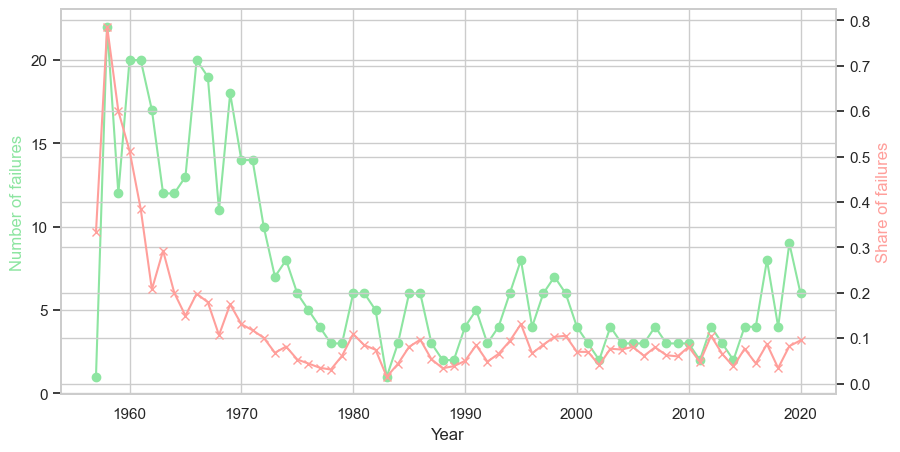

In [176]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(
    failures_byyear["year"],
    failures_byyear["count"], # must use in []. as '.count' is a method, not calling to get values from this column!!!!
    color="g",
    marker="o",
    label="Failures",
)
ax2.plot(
    failure_share_year["year"],
    failure_share_year["share"],
    color="r",
    marker="x",
    label="Failure Share",
)
ax1.set_xlabel('Year')
ax1.set_ylabel("Number of failures", color='g')
ax2.set_ylabel("Share of failures", color="r")

# Analyzing post Cold war space programs

In [177]:
postcold_war = by_country_year[(by_country_year["year"] > 1991)]
postcold_war.head()

,country,year,count
5,Brazil,1997,1
6,Brazil,1999,1
7,Brazil,2003,1
29,China,1992,4
30,China,1993,1


In [178]:
a = postcold_war.groupby('country').sum('count')
a

,year,count
country,,
Brazil,5999,3
China,54155,231
France,58174,242
India,48169,69
International,30094,36
"Iran, Islamic Republic of",16111,14
Israel,18066,9
Japan,56170,74
Kazakhstan,56162,119


In [179]:
postwar_graph = px.treemap(
    postcold_war,
    path=["country"],  # hierarchy
    values="count",  # column controlling area of each rectangle
    title="Post Cold War: Space Mission Launches",
)
postwar_graph.show()